In [29]:
from torch import nn, save, load
from torch.optim import Adam ##optimizer
from torch.utils.data import DataLoader ##load dataset from pytorch
from torchvision import datasets ##for using mnest lateron
from torchvision.transforms import ToTensor
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
train = datasets.MNIST(root = "data", download = True, train= True, transform= ToTensor())

In [3]:
dataset = DataLoader(train, 32) #batches of 32 images


In [4]:
image, label = train[0]

print(image.shape) #size of each image

torch.Size([1, 28, 28])


In [5]:
##Image Classifier NN

class ImageClassifier(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            
            nn.Conv2d(1,32, (3,3)), #images are B&W so the input is 1,32 filters(kernels)of shape 3*3
            nn.ReLU(),
            nn.Conv2d(32,64, (3,3)),
            nn.ReLU(),
            nn.Conv2d(64,64, (3,3)),
            nn.ReLU(),
            nn.Flatten(),
            #Reduction per dimension= Kernel Size−1
            nn.Linear(64*(28-6)*(28-6), 10) #10 is number of output classes
        )
        
        
        pass
    
    def forward(self, x): ##akin to call method in tensorflow
        return self.model(x) ##how the input data x should be processed through the layers of the network to produce the output. 
        
        

In [12]:
## Instance of the neural network, loss optimizer

clf = ImageClassifier().to('cpu')
optimizer = Adam(clf.parameters(), lr = 1e-3)
loss_func = nn.CrossEntropyLoss()


In [8]:
import torch
print(torch.cuda.is_available())


False


In [15]:
## training

if __name__ == "__main__":
    for epoch in range (5):
        for batch in dataset:
            X, y = batch
            X, y = X.to('cpu'), y.to('cpu')
            yhat = clf(X)
            loss = loss_func(yhat, y)
            
            #BP
            optimizer.zero_grad() ## lears the old gradients from the previous step.
            loss.backward() ##Computes the gradients of the loss function with respect to the model’s parameters.
            optimizer.step() ## Updates the model's parameters using the computed gradients.
        print(f"epoch: {epoch} loss is {loss.item()}")
        
    with open('model_state.pt', 'wb') as f: 
        save(clf.state_dict(), f)        


epoch: 0 loss is 1.2740432566715754e-06
epoch: 1 loss is 1.590670080986456e-06
epoch: 2 loss is 4.9114642024505883e-05
epoch: 3 loss is 5.483684435603209e-05
epoch: 4 loss is 6.891723955959606e-07


In [28]:
## prediction

if __name__ == "__main__":
        with open('model_state.pt', 'rb') as f: 
            clf.load_state_dict(load(f)) 
        
        img = Image.open('img_1.jpg')
        image_tensor = ToTensor()(img).unsqueeze(0).to('cpu')
    
        print(torch.argmax(clf(image_tensor)))
    

tensor(2)


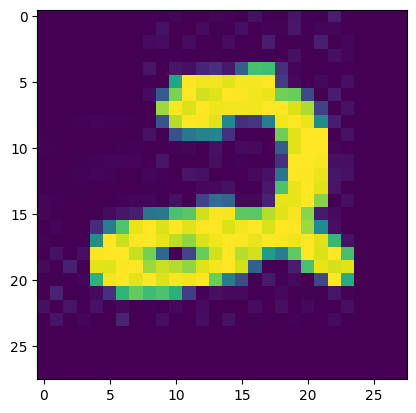

In [30]:
plt.imshow(img)